### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25/single/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241125$25^DAN_SDS_CYPS_0.05$single.txt
20241125$25^DAN_SDS_CYPS_0.03$single.txt
20241125$25^DAN_SDS_CYPS_0.01$single.txt
20241125$25^DAN_SDS_CYPS_phos$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            df = plotting.clean_single(df)
        elif "triple" in root:
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")

        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),EMOD,DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,76.0,6105.3,30.07,1.1160,5.494000e+09,5.494,0.000000e+00,0.017320,0.2328,17.44,0.8646,51.50,0.000040,60.825,1.3360,218.8,DAN_SDS_CYPS_0.05
1,77.0,3689.0,30.20,0.5889,4.821000e+09,4.821,9.811000e-09,0.005238,0.2649,19.41,0.8278,47.07,0.000021,40.662,0.5067,137.4,DAN_SDS_CYPS_0.05
2,78.0,3877.1,30.19,0.7642,5.951000e+09,5.951,0.000000e+00,0.007223,0.2319,20.75,0.8612,58.45,0.000029,42.994,0.7289,188.0,DAN_SDS_CYPS_0.05
3,79.0,2264.3,30.32,0.4273,5.722000e+09,5.722,-9.811000e-09,0.005178,0.2639,24.26,0.8245,56.54,0.000015,50.858,0.4449,196.5,DAN_SDS_CYPS_0.05
4,80.0,3180.5,30.10,0.5389,5.100000e+09,5.100,0.000000e+00,0.007317,0.2326,19.12,0.8306,49.35,0.000020,55.050,0.5901,185.5,DAN_SDS_CYPS_0.05


Statistical significance between DAN_SDS_CYPS_0.05 and DAN_SDS_CYPS_phos: p = 0.0048
Statistical significance between DAN_SDS_CYPS_0.03 and DAN_SDS_CYPS_phos: p = 0.0337
Statistical significance between DAN_SDS_CYPS_0.01 and DAN_SDS_CYPS_phos: p = 0.0024


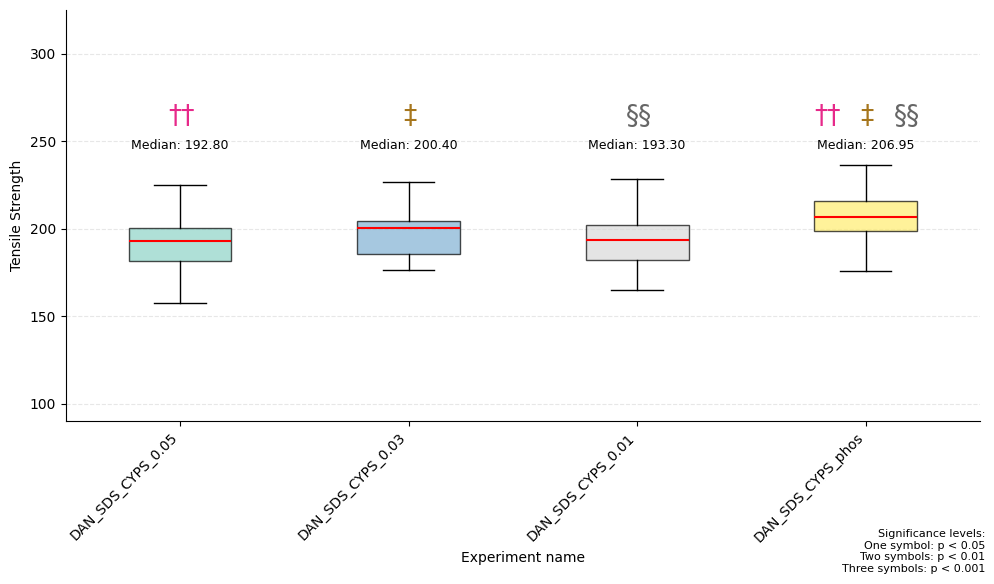

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for DAN_SDS_CYPS_0.05: 192.8
Median TENSILE_STRENGTH for DAN_SDS_CYPS_0.03: 200.4
Median TENSILE_STRENGTH for DAN_SDS_CYPS_0.01: 193.3
Median TENSILE_STRENGTH for DAN_SDS_CYPS_phos: 206.95


In [9]:
len(df_merged)

93

Statistical significance between DAN_SDS_CYPS_0.05 and DAN_SDS_CYPS_0.03: p = 0.0433
Statistical significance between DAN_SDS_CYPS_0.05 and DAN_SDS_CYPS_0.01: p = 0.0301
Statistical significance between DAN_SDS_CYPS_0.05 and DAN_SDS_CYPS_phos: p = 0.0005


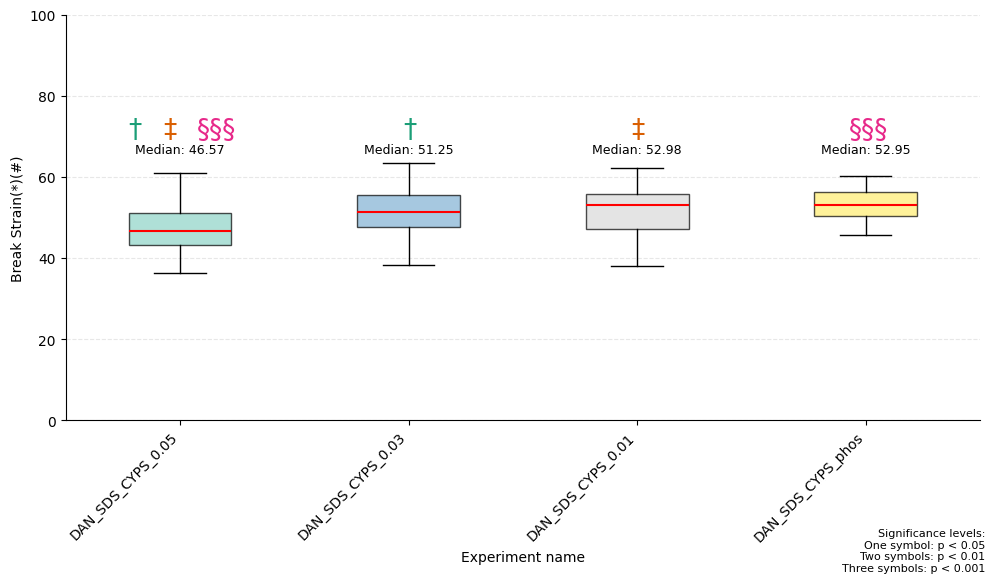

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

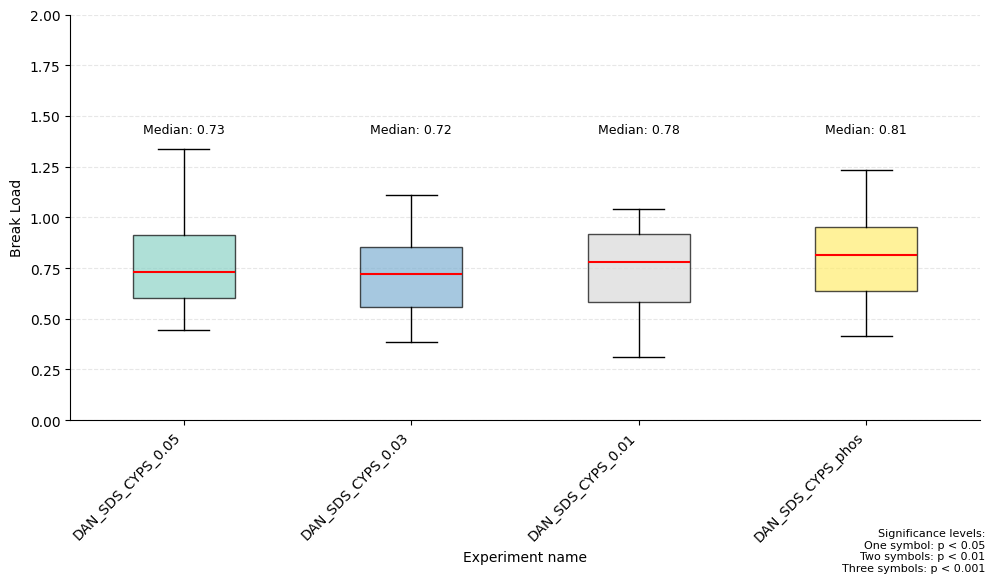

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()